## Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load train csv data files

In [ ]:

df_clinical_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
df_peptides_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
df_proteins_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
df_supp_clinical_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv")
print("Training size for clinical data: ",df_clinical_train.shape)
print("Training size for peptides data: ",df_peptides_train.shape)
print("Training size for proteins data: ",df_proteins_train.shape)
print("Training size for supplemental clinical data: ",df_supp_clinical_data.shape)

Training size for clinical data:  (2615, 8)
Training size for peptides data:  (981834, 6)
Training size for proteins data:  (232741, 5)
Training size for supplemental clinical data:  (2223, 8)


Performing general statistics on all the dataframes. Using methods like describe(), info(). Checking null values for each dataframe.

In [ ]:
df_clinical_train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [ ]:
df_clinical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


They are:
* 1 NaN in updrs_1 column
* 2 NaN in updrs_2 column
* 25 NaN in updrs_3 column
* 1038 NaN in updrs_4 column
* 1327 NaN in upd23b_clinical_state_on_medication column

In [ ]:
df_clinical_train.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [ ]:
df_clinical_train.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [ ]:
df_peptides_train

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
df_peptides_train.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [ ]:
df_peptides_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [ ]:
df_peptides_train

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
df_peptides_train.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [ ]:
df_proteins_train

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [ ]:
df_proteins_train.describe()

,visit_month,patient_id,NPX
count,232741.000000,232741.000000,2.327410e+05
mean,26.099205,32593.881873,2.712077e+06
std,22.874719,18608.479506,2.224155e+07
min,0.000000,55.000000,8.460820e+01
25%,6.000000,16566.000000,2.946440e+04
50%,24.000000,29313.000000,1.135560e+05
75%,48.000000,49995.000000,5.638940e+05
max,108.000000,65043.000000,6.138510e+08


In [ ]:
df_proteins_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [ ]:
df_proteins_train.isnull().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [ ]:
df_supp_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [ ]:
df_supp_clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2223.000000,2223.000000,2010.000000,2009.000000,2218.000000,1295.000000
mean,32478.016194,12.910481,5.684080,6.507715,22.917944,0.840154
std,18637.562796,13.060532,4.366964,4.968132,12.342596,1.860247
min,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16703.000000,0.000000,2.000000,2.000000,14.000000,0.000000
50%,32915.000000,6.000000,5.000000,5.000000,22.000000,0.000000
75%,47243.000000,24.000000,8.000000,10.000000,31.000000,0.000000
max,65530.000000,36.000000,27.000000,34.000000,72.000000,12.000000


In [ ]:
df_supp_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [ ]:
df_supp_clinical_data.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64

To see the correlation between all the target variables.

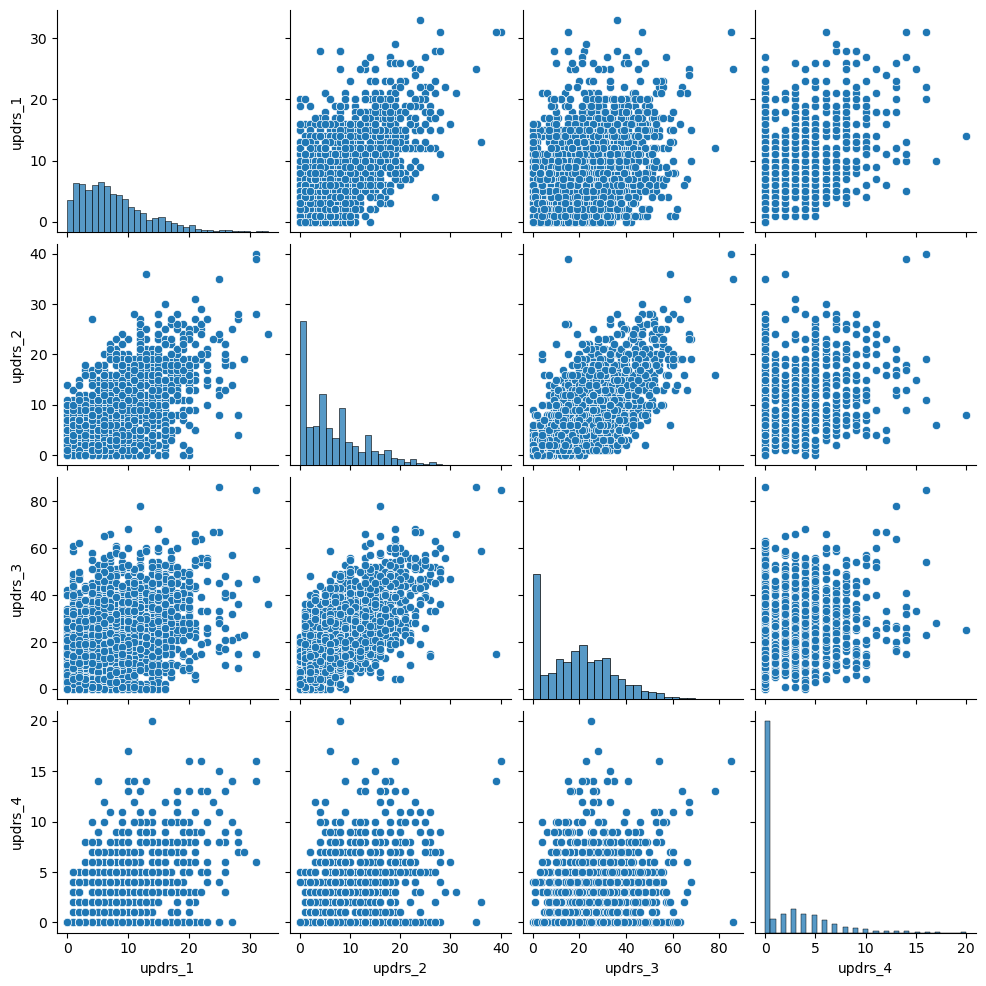

In [ ]:
sns.pairplot(df_clinical_train[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])

Pateint overall distribution.

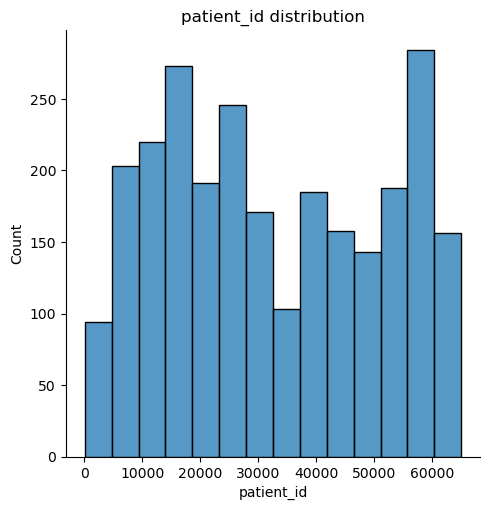

In [ ]:
sns.displot(df_clinical_train['patient_id']);
plt.title("Pateints Frequency");

Analyse and visualse visits frequency of the patients.

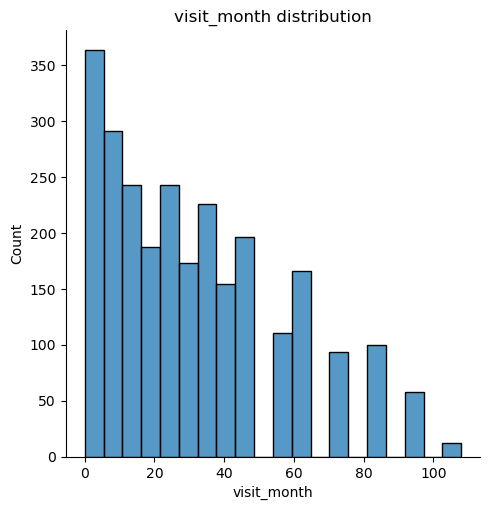

In [ ]:
sns.displot(df_clinical_train['visit_month']);
plt.title("Months visited distribution");

To analyse the overall progrerssion of the proteins over the time.

In [ ]:
df_clinical_train.groupby('visit_month').mean()[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,
0,5.572581,4.439516,13.754032,2.047619
3,5.513043,6.634783,20.482456,0.142857
6,7.109375,6.963542,20.272251,2.307692
9,6.080808,7.204082,20.474747,0.488372
12,6.222222,5.320988,16.165975,1.308271
18,7.299465,6.866310,19.016216,1.218978
24,6.670782,5.658436,16.489540,1.658065
30,8.231214,7.647399,21.710983,1.753425
36,7.331858,6.230088,18.316964,1.765432


To analyse the overall progrerssion of the proteins in patients.

In [ ]:
df_clinical_train.groupby('patient_id').mean()[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

,updrs_1,updrs_2,updrs_3,updrs_4
patient_id,,,,
55,12.615385,13.076923,40.923077,0.000000
942,3.933333,4.066667,25.600000,0.272727
1517,18.400000,12.700000,32.600000,6.300000
1923,2.142857,0.142857,1.142857,NaN
2660,3.833333,0.000000,0.833333,NaN
...,...,...,...,...
63875,3.444444,1.000000,1.000000,0.000000
63889,6.800000,5.500000,18.700000,1.555556
64669,16.266667,15.800000,34.533333,0.000000


Analysing number of patients visiting and average visits for months.

In [ ]:
patientVisiting = train_clinical_df[['patient_id','visit_month']].groupby(['patient_id']).count()
patientVisiting

,visit_month
patient_id,
55,13
942,15
1517,10
1923,7
2660,6
...,...
63875,9
63889,10
64669,15


Diving more into patients visiting during the course of the medications.

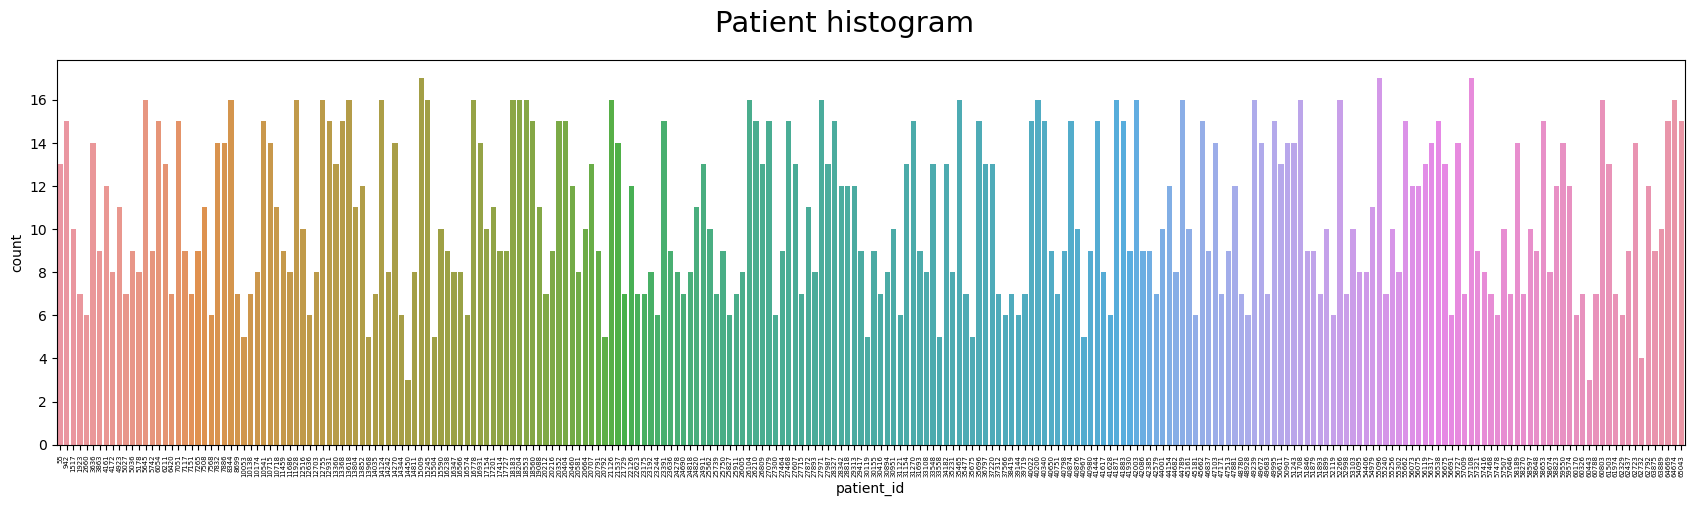

In [ ]:
fig, ax = plt.subplots(figsize=(21, 5))
sns.countplot(data=train_clinical_df[['patient_id','visit_month']], x="patient_id")
ax.tick_params(axis='x', rotation=90, labelsize=5)
fig.suptitle("Patient histogram", fontsize=21)
plt.show()

Analysing our target variables by plotting distribution plots.

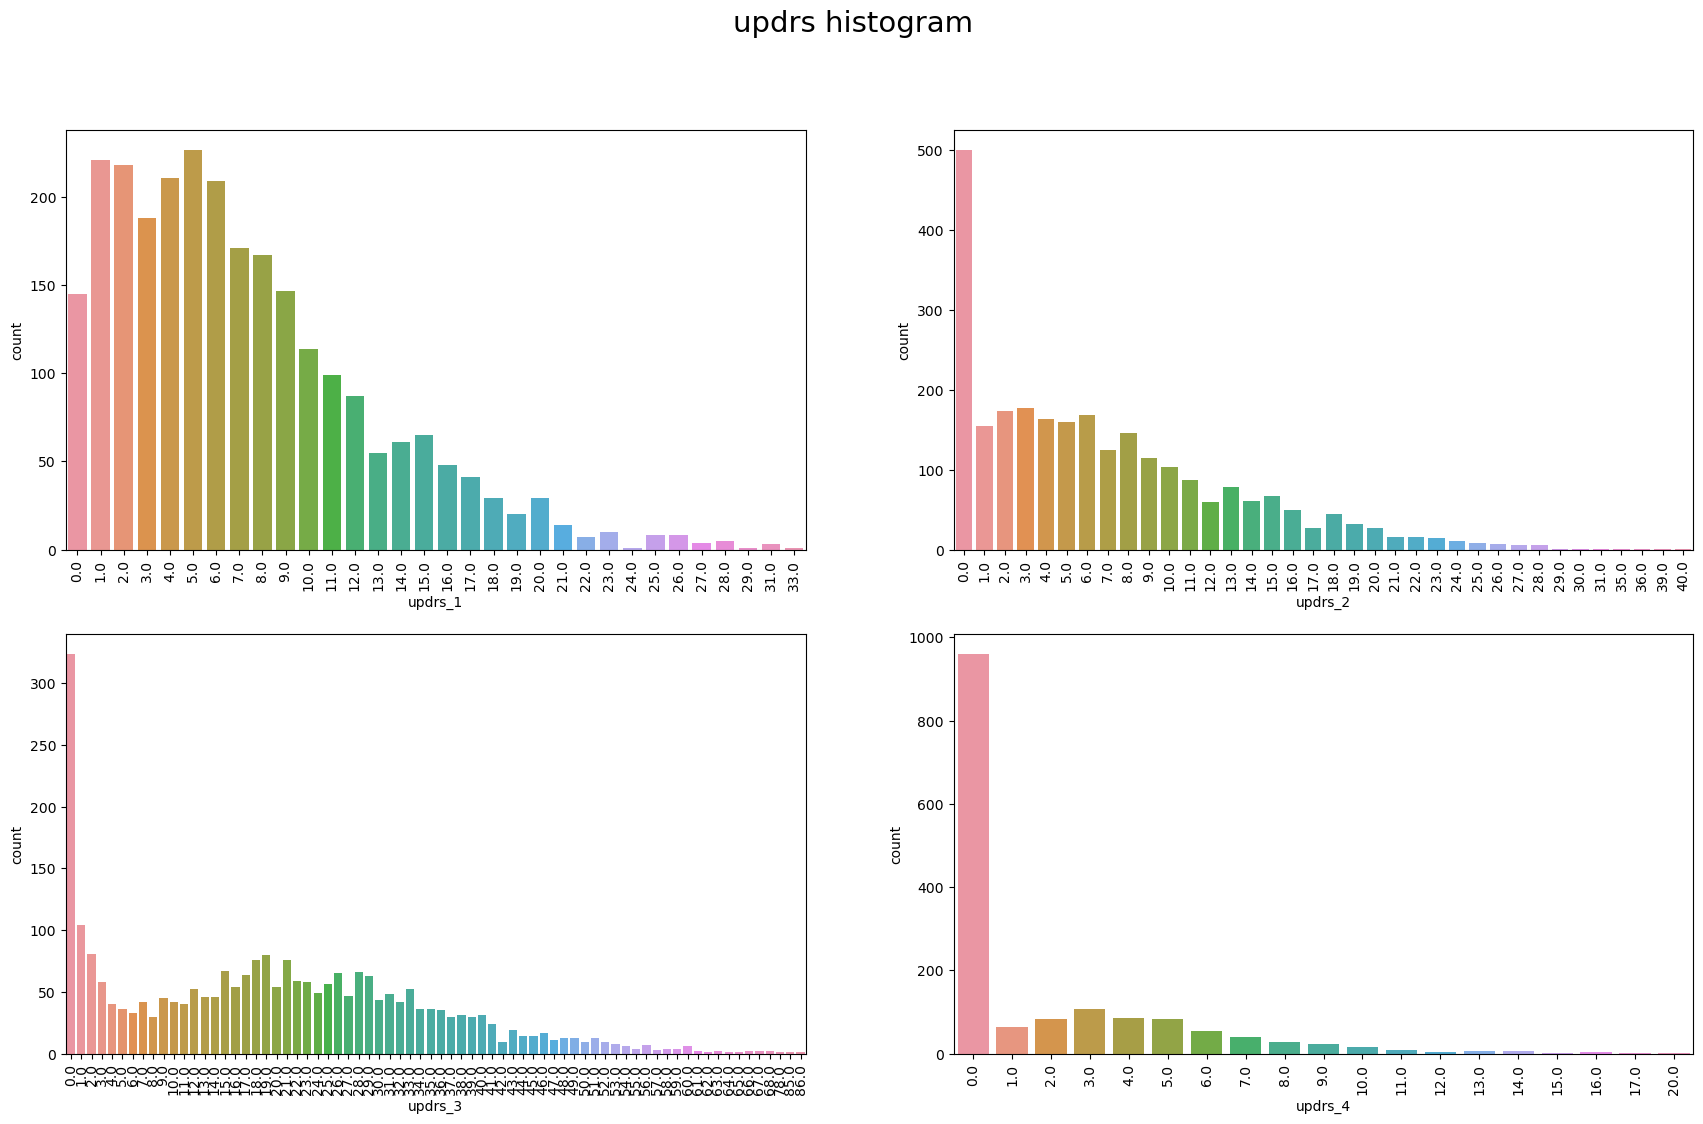

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12))

axes[0, 0].set_xlabel("updrs_1")
axes[0, 0].tick_params(axis='x', rotation=90)
sns.countplot(data=train_clinical_df, x="updrs_1", ax=axes[0, 0])

axes[0, 1].set_xlabel("updrs_2")
axes[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(data=train_clinical_df, x="updrs_2", ax=axes[0, 1])

axes[1, 0].set_xlabel("updrs_3")
axes[1, 0].tick_params(axis='x', rotation=90)
sns.countplot(data=train_clinical_df, x="updrs_3", ax=axes[1, 0])

axes[1, 1].set_xlabel("updrs_4")
axes[1, 1].tick_params(axis='x', rotation=90)
sns.countplot(data=train_clinical_df, x="updrs_4", ax=axes[1, 1])

fig.suptitle("updrs histogram", fontsize=21)

# Show the plots
plt.show()

Our targets variables are analysed with the progressing months. The UPDRS value when increasing along with time shows the indication and rise of the disease.

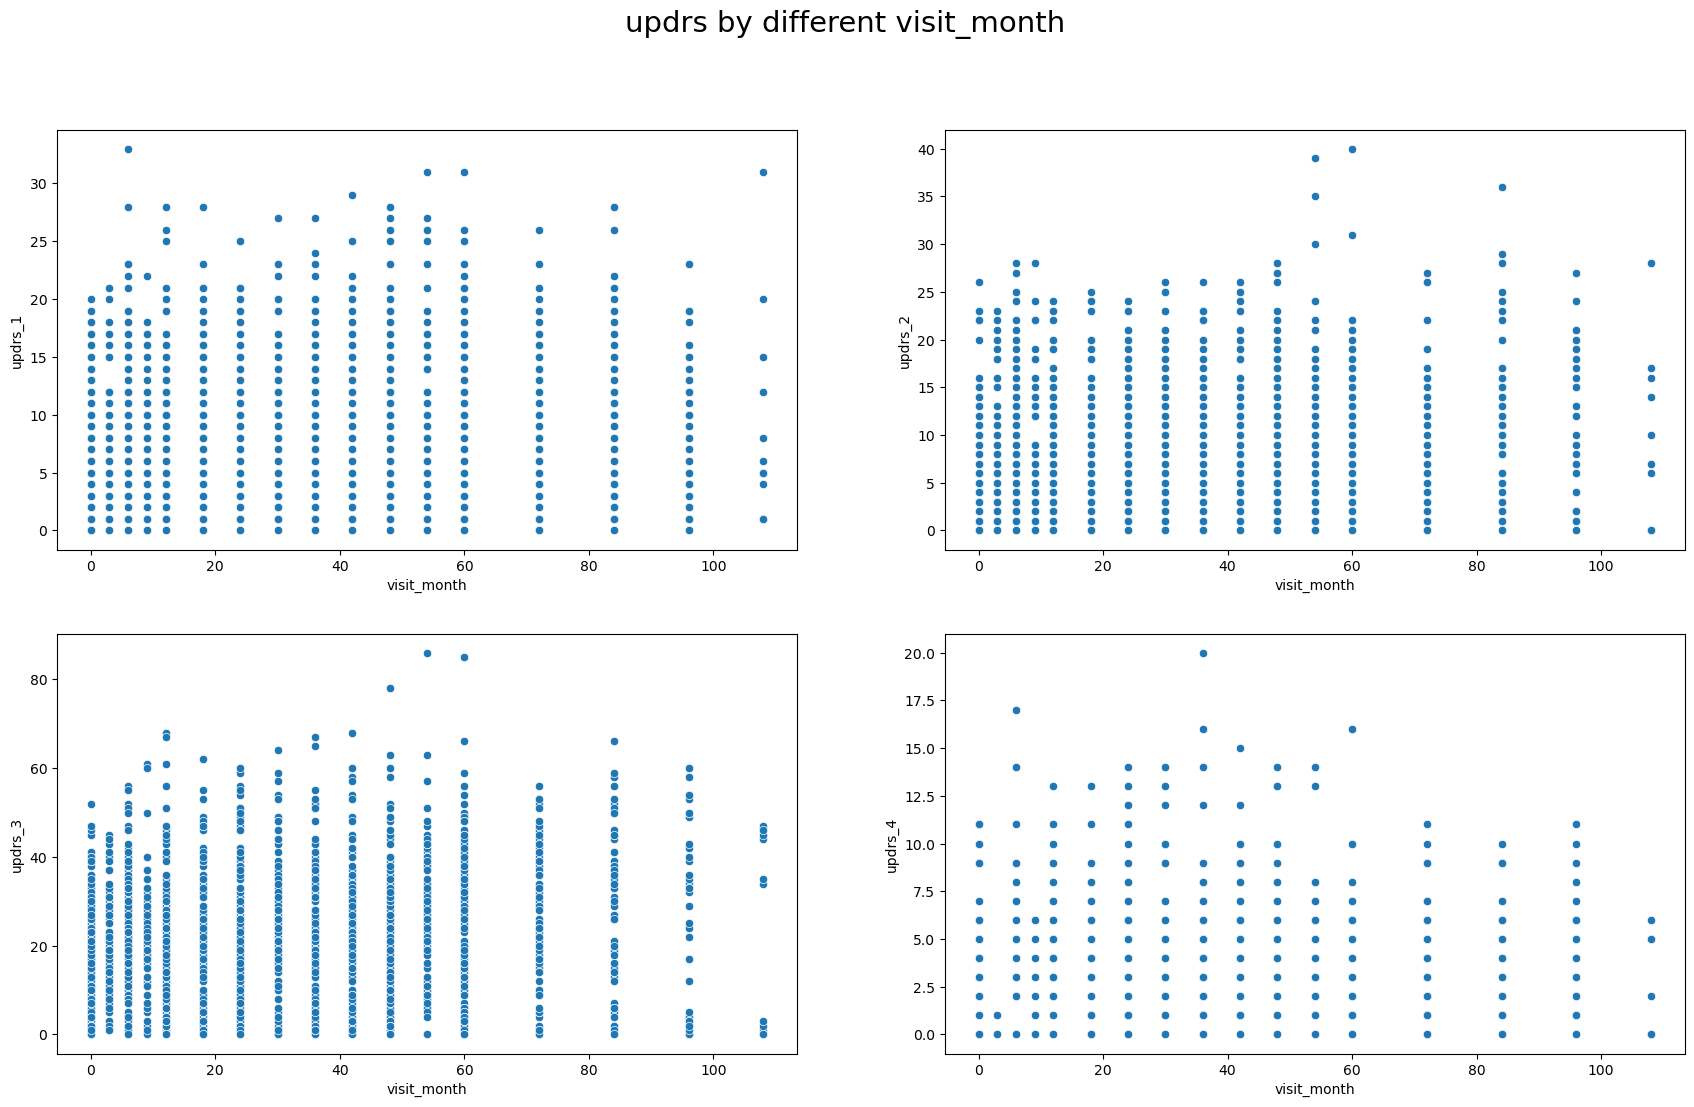

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12))

sns.scatterplot(data=train_clinical_df, x="visit_month", y="updrs_1", ax=axes[0, 0])

sns.scatterplot(data=train_clinical_df, x="visit_month", y="updrs_2", ax=axes[0, 1])

sns.scatterplot(data=train_clinical_df, x="visit_month", y="updrs_3", ax=axes[1, 0])

sns.scatterplot(data=train_clinical_df, x="visit_month", y="updrs_4", ax=axes[1, 1])

fig.suptitle("updrs by different visit_month", fontsize=21)

# Show the plots
plt.show()

Target variables Vs Patients

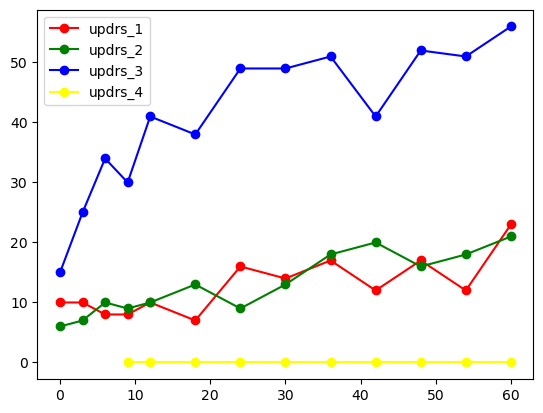

In [ ]:
df_viz = df_clinical_train[df_clinical_train["patient_id"]==55]
fig, ax = plt.subplots(1, 1)

ax.plot(df_viz['visit_month'], df_viz['updrs_1'], marker='o', color="red", label="updrs_1", linestyle="-")
ax.plot(df_viz['visit_month'], df_viz['updrs_2'], marker='o', color="green", label="updrs_2", linestyle="-")
ax.plot(df_viz['visit_month'], df_viz['updrs_3'], marker='o', color="blue", label="updrs_3", linestyle="-")
ax.plot(df_viz['visit_month'], df_viz['updrs_4'], marker='o', color="yellow", label="updrs_4", linestyle="-")

ax.legend()
plt.show()

The patien's disease progression is recorded till 36 months of the visitation. Thus, data allows us to see the progression of proteins indicating presence of diseases over the time.

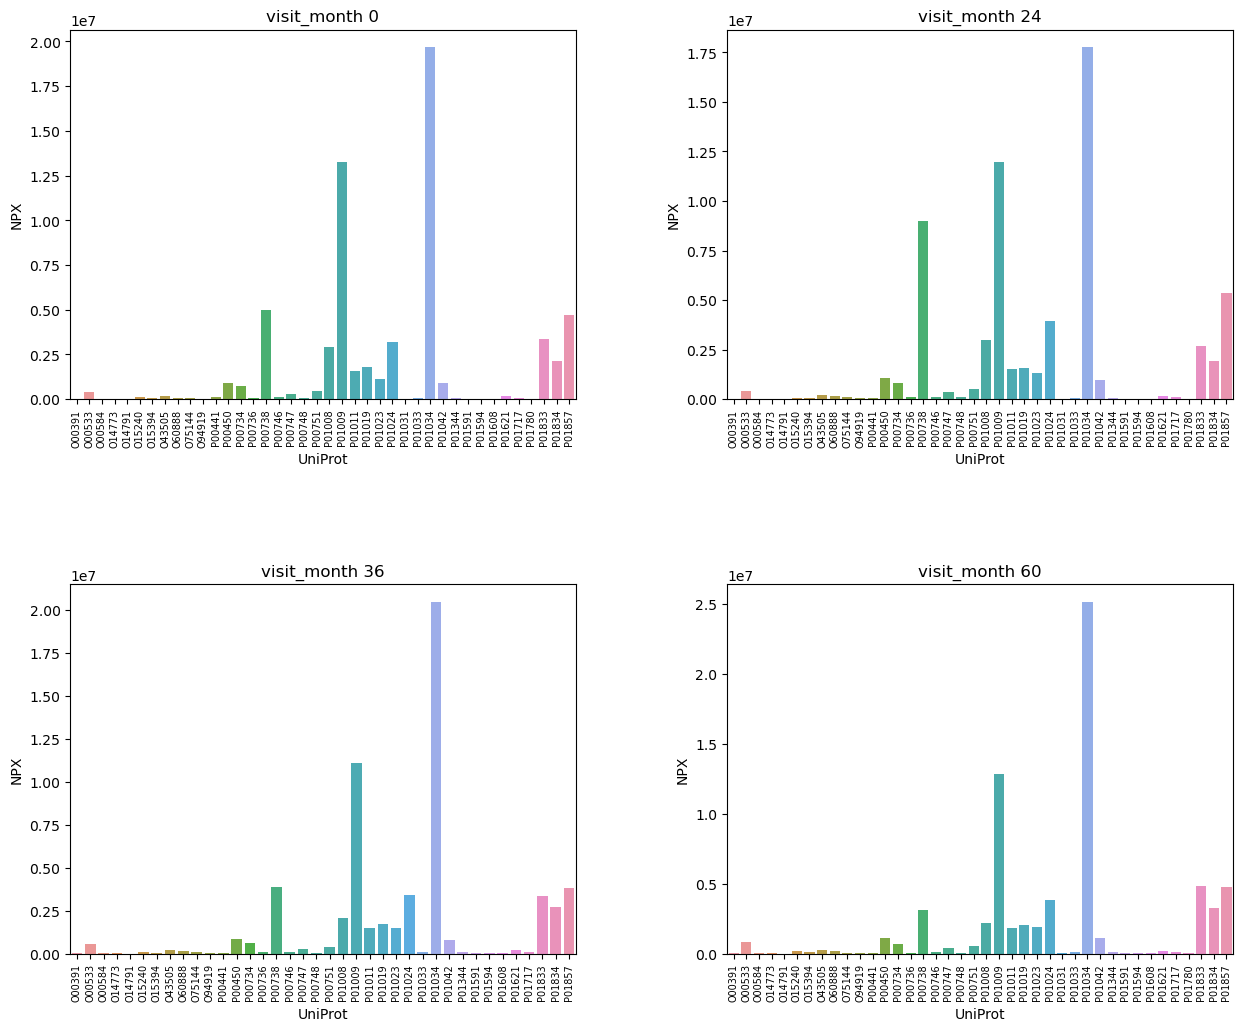

In [ ]:
import math
df_viz2 = df_proteins_train[df_proteins_train["patient_id"]==1517]
protein_list = df_viz2['UniProt'].unique()
protein_list = protein_list[:40]
df_viz2 = df_viz2[df_viz2['UniProt'].isin(protein_list)]
unique_month = df_viz2['visit_month'].unique()
unique_month.sort()
p_len = len(unique_month)

df_viz2['visit_month'].unique()
n_rows = math.ceil(p_len/2)
figure, axis = plt.subplots(n_rows, 2, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(unique_month):
    row = i//2
    col = i % 2
    df = df_viz2[df_viz2['visit_month']==month]
    bp = sns.barplot(ax=axis[row, col], x=df['UniProt'], y=df['NPX'])
    #bp.set(xticklabels=[])
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title('visit_month ' + str(month))
plt.show()

#### Patient id present in each data file

supp_clinical contains more unique patient informations

In [ ]:
df_clinical_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
df_peptides_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
df_proteins_train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
df_supp_clinical_data

In [ ]:
print(len(df_clinical_train.patient_id.unique()),"unique patient in train_clinical data.")

print(len(df_peptides_train.patient_id.unique()),"unique patient in train_peptides data.")

print(len(df_proteins_train.patient_id.unique()),"unique patient in train_proteins data.")

print(len(df_supp_clinical_data.patient_id.unique()),"unique patient in supp_clinical data.")


248 unique patient in train_clinical data.
248 unique patient in train_peptides data.
248 unique patient in train_proteins data.
771 unique patient in supp_clinical data.


### Recall the columns list in each data file

train_clinical and supp_clinical has same culumns list.

train_peptides and train_proteins has 'visit_id', 'visit_month', 'patient_id', 'UniProt' columns in common.

In [ ]:
print("train_clinical columns: ",list(df_clinical_train.columns))
print("supp_clinical columns : ",list(df_supp_clinical_data.columns))
print("train_peptides columns: ",list(df_peptides_train.columns))
print("train_proteins columns: ",list(df_proteins_train.columns))

train_clinical columns:  ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']
supp_clinical columns :  ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']
train_peptides columns:  ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide', 'PeptideAbundance']
train_proteins columns:  ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX']


### Merge  proteins and peptide dataframes

In [ ]:
key_columns = ['visit_id','patient_id','visit_month','UniProt']
train_proteins_peptides_df = df_peptides_train.merge(df_proteins_train,on = key_columns,how = 'left')

In [ ]:
train_proteins_peptides_df

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00,732430.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00,732430.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,732430.0
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70,732430.0
...,...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00,369437.0
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00,105830.0
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60,21257.6
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,17953.1


In [ ]:
train_proteins_peptides_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981834 entries, 0 to 981833
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
 6   NPX               981834 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 59.9+ MB


In [ ]:
train_proteins_peptides_df.describe()

,visit_month,patient_id,PeptideAbundance,NPX
count,981834.000000,981834.000000,9.818340e+05,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05,1.699754e+07
std,22.913897,18605.934422,3.377989e+06,6.315432e+07
min,0.000000,55.000000,1.099850e+01,8.460820e+01
25%,6.000000,16566.000000,2.817425e+04,2.432580e+05
50%,24.000000,29313.000000,7.430830e+04,9.922740e+05
75%,48.000000,49995.000000,2.213388e+05,3.723542e+06
max,108.000000,65043.000000,1.787520e+08,6.138510e+08


### Merge  clinical and supp clinical dataframes

To avoid missing patient data on proteins and peptides, I do this merging only for data of the 248 patients presents in the proteins and peptides data files.

In [ ]:
# Get the supp_clinical data only for the 248 patients
supp_clinical_data_248 = df_supp_clinical_data[df_supp_clinical_data.patient_id.isin(list(df_clinical_train.patient_id.unique()))]
supp_clinical_data_248

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication


In [ ]:
key_cols = ['visit_id','patient_id','visit_month']
all_clinical_df = df_clinical_train.merge(df_supp_clinical_data,on = key_cols,how = 'outer')
all_clinical_df

,visit_id,patient_id,visit_month,updrs_1_x,updrs_2_x,updrs_3_x,updrs_4_x,upd23b_clinical_state_on_medication_x,updrs_1_y,updrs_2_y,updrs_3_y,updrs_4_y,upd23b_clinical_state_on_medication_y
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,NaN,NaN,NaN
4,55_12,55,12,10.0,10.0,41.0,0.0,On,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,NaN,NaN,NaN,NaN,NaN,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,NaN,NaN,NaN,NaN,NaN,10.0,6.0,24.0,0.0,NaN


In [ ]:
all_clinical_df.describe()

,patient_id,visit_month,updrs_1_x,updrs_2_x,updrs_3_x,updrs_4_x,updrs_1_y,updrs_2_y,updrs_3_y,updrs_4_y
count,4838.000000,4838.000000,2614.000000,2613.00000,2590.000000,1577.000000,2010.000000,2009.000000,2218.000000,1295.000000
mean,32571.918148,22.791236,7.110559,6.74359,19.421236,1.861763,5.684080,6.507715,22.917944,0.840154
std,18580.884720,22.461780,5.525955,6.32323,15.000289,3.022112,4.366964,4.968132,12.342596,1.860247
min,35.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16687.250000,5.000000,3.000000,1.00000,6.000000,0.000000,2.000000,2.000000,14.000000,0.000000
50%,31154.000000,18.000000,6.000000,5.00000,19.000000,0.000000,5.000000,5.000000,22.000000,0.000000
75%,49239.000000,36.000000,10.000000,10.00000,29.000000,3.000000,8.000000,10.000000,31.000000,0.000000
max,65530.000000,108.000000,33.000000,40.00000,86.000000,20.000000,27.000000,34.000000,72.000000,12.000000


In [ ]:
all_clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4838 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   visit_id                               4838 non-null   object 
 1   patient_id                             4838 non-null   int64  
 2   visit_month                            4838 non-null   int64  
 3   updrs_1_x                              2614 non-null   float64
 4   updrs_2_x                              2613 non-null   float64
 5   updrs_3_x                              2590 non-null   float64
 6   updrs_4_x                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication_x  1288 non-null   object 
 8   updrs_1_y                              2010 non-null   float64
 9   updrs_2_y                              2009 non-null   float64
 10  updrs_3_y                              2218 non-null   float64
 11  updr

## Load test csv data files

In [ ]:
# Load example test files in a Pandas dataframe.
test_df = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv")
test_peptides_df = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv")
test_proteins_df = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv")

In [ ]:
test_df

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
5,50423_0,0,50423,updrs_2,50423_0_updrs_2,0
6,50423_0,0,50423,updrs_3,50423_0_updrs_3,0
7,50423_0,0,50423,updrs_4,50423_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   visit_id     16 non-null     object
 1   visit_month  16 non-null     int64 
 2   patient_id   16 non-null     int64 
 3   updrs_test   16 non-null     object
 4   row_id       16 non-null     object
 5   group_key    16 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [ ]:
test_df.describe()

,visit_month,patient_id,group_key
count,16.000000,16.000000,16.000000
mean,3.000000,26882.500000,3.000000
std,3.098387,24312.523856,3.098387
min,0.000000,3342.000000,0.000000
25%,0.000000,3342.000000,0.000000
50%,3.000000,26882.500000,3.000000
75%,6.000000,50423.000000,6.000000
max,6.000000,50423.000000,6.000000


In [ ]:
test_peptides_df

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.60,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.40,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.00,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.20,0
...,...,...,...,...,...,...,...
2052,3342_6,6,3342,Q9Y646,AIINLAVYGK,6142.76,6
2053,3342_6,6,3342,Q9Y646,LALLVDTVGPR,23602.30,6
2054,3342_6,6,3342,Q9Y646,VGALASLIR,21728.20,6
2055,3342_6,6,3342,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6


In [ ]:
test_peptides_df.describe()

,visit_month,patient_id,PeptideAbundance,group_key
count,2057.000000,2057.000000,2.057000e+03,2057.000000
mean,3.021877,26710.838600,6.525070e+05,3.021877
std,3.000650,23545.598081,3.137186e+06,3.000650
min,0.000000,3342.000000,8.860860e+02,0.000000
25%,0.000000,3342.000000,2.636690e+04,0.000000
50%,6.000000,3342.000000,7.291430e+04,6.000000
75%,6.000000,50423.000000,2.084040e+05,6.000000
max,6.000000,50423.000000,5.562260e+07,6.000000


In [ ]:
test_proteins_df

,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.90,0
1,50423_0,0,50423,O00533,490742.00,0
2,50423_0,0,50423,O00584,43615.30,0
3,50423_0,0,50423,O14773,16486.60,0
4,50423_0,0,50423,O14791,2882.42,0
...,...,...,...,...,...,...
448,3342_6,6,3342,Q9UHG2,325226.00,6
449,3342_6,6,3342,Q9UKV8,64411.50,6
450,3342_6,6,3342,Q9UNU6,25117.50,6
451,3342_6,6,3342,Q9Y646,51473.30,6


In [ ]:
test_proteins_df.describe()

,visit_month,patient_id,NPX,group_key
count,453.000000,453.000000,4.530000e+02,453.000000
mean,2.993377,26934.465784,2.962930e+06,2.993377
std,3.003309,23566.468568,2.533508e+07,3.003309
min,0.000000,3342.000000,2.287040e+03,0.000000
25%,0.000000,3342.000000,2.947880e+04,0.000000
50%,0.000000,50423.000000,1.153780e+05,0.000000
75%,6.000000,50423.000000,5.301620e+05,6.000000
max,6.000000,50423.000000,4.392080e+08,6.000000
